<br>
<img src="https://images.even3.com.br/ONieRmTALZ2ETt2LfoUY4_IopIU=/fit-in/250x250/smart/even3.blob.core.windows.net/logos/UFCSPA-logotipo-1.19fc99573cf34163a727.png" style="width: 100px;"/>
<center>Aprendizado profundo para Visão Computacional I
    <br>
    Prof. Carla Becker</center>
    
## <center>  **Aula 4: Métricas de Avaliaçao de desempenho em Modelos de classificação binária** <center>

# <font color='blue'> Estudo de caso: Pima Indians Diabetes Database </font>
https://www.kaggle.com/uciml/pima-indians-diabetes-database

<img src="https://static.tuasaude.com/media/article/dr/nj/diabetes_52276_l.jpg" style="width: 200px;"/>

**O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem diabetes. Composto por dados de mulheres com 21 anos de idade ou mais.**

<br>

Descrição das variáveis:
- Número de vezes que engravidou
- Concentração de glicose plasmática a 2 horas em um - teste oral de tolerância à glicose
- Pressão arterial diastólica (mm Hg)
- Espessura da dobra da pele do tríceps (mm)
- Insulina sérica de 2 horas (muU/ml)
- Índice de massa corporal (kg/m2) 
- Diabetes Pedigree Function  (tendência ao desenvolvimento de diabetes) 
- Resultado: (0 = não possui diabetes ou 1 = possui diabetes)





### 1) Leitura dos dados

In [33]:
import pandas as pd

In [34]:
data=pd.read_csv('diabetes.csv') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2) Identificando dados de entrada e dados de saída
Obs: Nenhum outro tratamento foi feito neste dataset (Remover dados duplicados, remover outliers, remover dados faltantes, remover ou substituir dados incompletos, feature engineering)

In [35]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].values
Y=data['Outcome'].values

### 3) Separando dados para treino, validação e teste

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

In [37]:
X2, X_test, y2, y_test = train_test_split(X, Y, test_size=0.1,random_state=20,shuffle=True,stratify=Y) #separei 10% para teste, restante chamei de X2
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.2,random_state=20,shuffle=True,stratify=y2) #separei 10% para teste, restante chamei de X2

print('treino:',np.shape(X_train))
print('teste:',np.shape(X_test))
print('validação:',np.shape(X_val))

treino: (552, 8)
teste: (77, 8)
validação: (139, 8)


# <font color='blue'> Modelo de classificação binária </font>

### 1) Criação do modelo

In [38]:
import tensorflow as tf
import keras as ke

In [73]:
tf.random.set_seed(20)   # fixar o pseudo-random generator do tensorflow
np.random.seed(20)

model = ke.Sequential()
model.add(ke.layers.Input(X_train.shape[1],))  #Camada de entrada: informando ao modelo quantas features eu tenho na entrada
model.add(ke.layers.Dense(15, activation='relu'))
model.add(ke.layers.Dense(10, activation='relu'))
model.add(ke.layers.Dense(1, activation='sigmoid')) # modelos de classificação binária sempre devem ter 1 neurônio na última camada

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 15)                135       
                                                                 
 dense_20 (Dense)            (None, 10)                160       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

### 2) Treinamento e validação do modelo

In [75]:
history=model.fit(x=X_train,y=y_train,
                  epochs=40,
                  validation_data=(X_val, y_val));

Epoch 1/40
18/18 [==============================] - 1s 8ms/step - loss: 3.5258 - accuracy: 0.4402 - val_loss: 1.8593 - val_accuracy: 0.5036
Epoch 2/40
18/18 [==============================] - 0s 3ms/step - loss: 1.5462 - accuracy: 0.5543 - val_loss: 1.5230 - val_accuracy: 0.5540
Epoch 3/40
18/18 [==============================] - 0s 3ms/step - loss: 1.2538 - accuracy: 0.5688 - val_loss: 1.6336 - val_accuracy: 0.6835
Epoch 4/40
18/18 [==============================] - 0s 3ms/step - loss: 1.1178 - accuracy: 0.5978 - val_loss: 1.4098 - val_accuracy: 0.5612
Epoch 5/40
18/18 [==============================] - 0s 3ms/step - loss: 1.0312 - accuracy: 0.6304 - val_loss: 1.0338 - val_accuracy: 0.6763
Epoch 6/40
18/18 [==============================] - 0s 3ms/step - loss: 0.9437 - accuracy: 0.6413 - val_loss: 1.0420 - val_accuracy: 0.6763
Epoch 7/40
18/18 [==============================] - 0s 3ms/step - loss: 0.9098 - accuracy: 0.6558 - val_loss: 1.1770 - val_accuracy: 0.6331
Epoch 8/40
18/18 [==

### Curvas de aprendizado

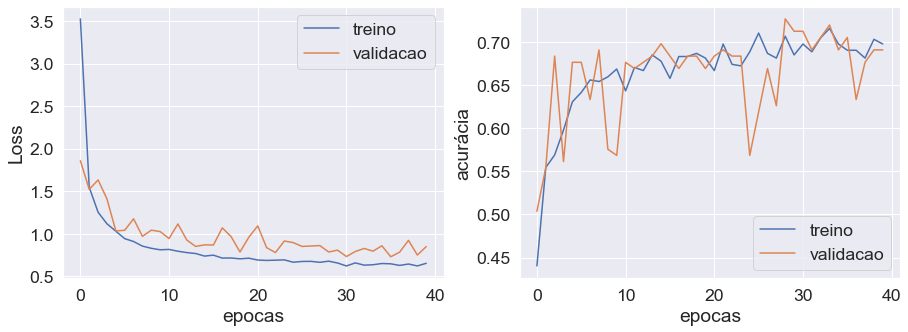

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

### Matriz de confusão

In [77]:
import sklearn.metrics as skm 
import seaborn as sns

In [78]:
def mat_conf(Xmedido, ymedido, model,nome_dados):
    Y_pred_prob = model.predict(Xmedido)
    Y_pred = np.round(Y_pred_prob) # limiar 50%
    cmat=skm.confusion_matrix(ymedido,Y_pred)
    cm_df = pd.DataFrame(cmat) 

    ax= plt.subplot()
    sns.heatmap(cm_df,annot=True, cmap='Blues',fmt="d",cbar=False)
    plt.title('Teste')


    ax.set_xlabel('Predito');ax.set_ylabel('Real'); 
    ax.set_title('Matriz de confusão:'+nome_dados); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
    return

18/18 [==============================] - 0s 821us/step


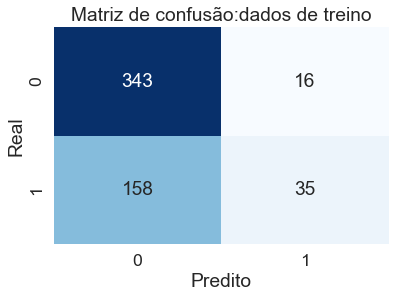

In [79]:
mat_conf(X_train, y_train, model,'dados de treino')

5/5 [==============================] - 0s 997us/step


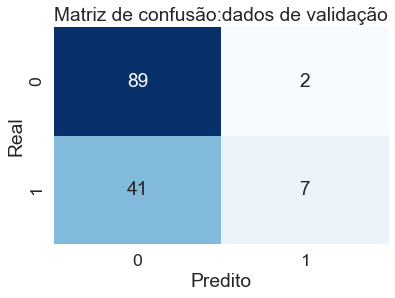

In [80]:
mat_conf(X_val, y_val, model,'dados de validação')

### Avaliar o modelo com os dados de teste
Assumindo que os hiperparâmetros já foram ajustados, o modelo já foi treinado e chegamos na nossa melhor configuração.

3/3 [==============================] - 0s 997us/step


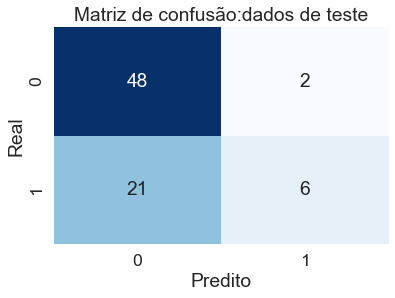

In [81]:
mat_conf(X_test, y_test, model,'dados de teste')

Obs: Existe uma série de outras métricas que são utilizadas para avaliar a qualidade dos modelos. Vamos estudá-las ao longo da disciplina!

# Avaliando separadamente os dados de teste

Accuracy: 70.13%

3/3 [==============================] - 0s 997us/step
54
              precision    recall  f1-score   support

         pos       0.70      0.96      0.81        50
         neg       0.75      0.22      0.34        27

    accuracy                           0.70        77
   macro avg       0.72      0.59      0.57        77
weighted avg       0.71      0.70      0.64        77

[[48  2]
 [21  6]]


<AxesSubplot:>

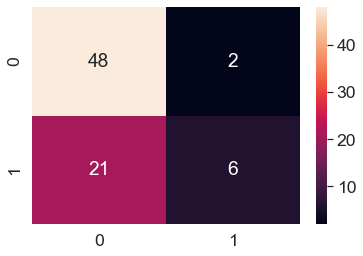

In [82]:
score, acc = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (acc*100))
print()

from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(np.array(X_test))
#print(y_pred)

from sklearn.metrics import accuracy_score

y_pred = (y_pred > 0.5)  # limiar 50%
#print(y_pred)

print(accuracy_score(y_test, y_pred, normalize=False))


target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))
print(cnf_matrix_test)


df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, fmt='d')

# Calculando a taxa de erro através da matriz de confusão (dados de teste):

In [83]:
TP = cnf_matrix_test[1, 1]
TN = cnf_matrix_test[0, 0]
FP = cnf_matrix_test[0, 1]
FN = cnf_matrix_test[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.2987012987012987


In [92]:
# Calculando a acurácia através da matriz de confusão (dados de teste):

In [86]:
accuracy = (TP + TN)/float(TP + TN + FP + FN)
print(accuracy)

0.7012987012987013


In [ ]:
# Calculando a Sensibilidade/Recall através da matriz de confusão (dados de teste):

In [87]:
sensitivity = (TP)/float(TP + FN) #OU RECALL
print(sensitivity) # essa é uma métrica de avalição muito importante na área médica

0.2222222222222222


In [93]:
# Calculando a Espedificidade através da matriz de confusão (dados de teste):

In [88]:
specificity = (TN)/float(TN + FP)
print(specificity)

0.96


In [94]:
# Calculando a precisão através da matriz de confusão (dados de teste):

In [89]:
precision = (TP)/float(TP + FP)
print(precision )

# OBS: A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os
# Falsos Negativos!! Por exemplo, no mercado de ações é necessário termos um bom modelo correto de previsão de compra. O modelo
# deve ser preciso em suas classificações, pois se consideramos um investimento bom, quando na verdade ele não é, teremos um 
# grande problema financeiro. Classificar uma boa ação como ruim (situação de Falso Negativo) no processo de compra é melhor
# do que classificar uma ação ruim como boa (situação de Falso Positivo).

0.75


In [95]:
# Calculando o f1_score através da matriz de confusão (dados de teste):

In [91]:
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f1_score) 


0.34285714285714286


# Curva ROC

AUC score: 0.5911


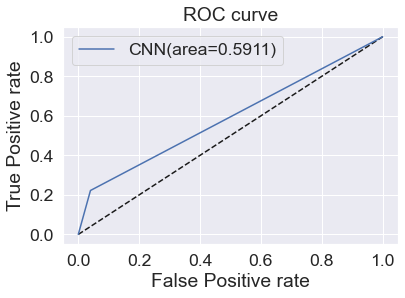

In [84]:
#ROC curve SITE IMPORTANTE
#https://www.kaggle.com/ramanchandra/sentiment-analysis-on-imdb-movie-reviews/data

from sklearn.metrics import roc_curve,auc

fpr_cnn,tpr_cnn,thresold_cnn=roc_curve(y_test,y_pred)

#AUC score for CNN

auc_cnn=auc(fpr_cnn,tpr_cnn)
print('AUC score:',np.round(auc_cnn,4)) # o 4 aqui é o número de casas após a vírgula (precisão)
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_cnn,tpr_cnn,label='CNN(area={:.4f})'.format(auc_cnn))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()